In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa
import glob
import holidays
from holidays import country_holidays
import pytz



In [2]:
crimes_path = ('Data/*.csv')

In [3]:
files = glob.glob(crimes_path)
files

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [4]:
crimes = pd.concat(pd.read_csv(file) for file in files)
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [6]:
fmt = '%m/%d/%Y %H:%M:%S %p'
crimes['Date'] = pd.to_datetime(crimes['Date'], format=fmt)

In [7]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [8]:
crimes_ts = crimes.set_index('Date')
crimes_ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 01:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 01:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 12:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [9]:
crimes_ts.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2022-12-31 12:41:00', '2022-12-31 12:42:00',
               '2022-12-31 12:44:00', '2022-12-31 12:45:00',
               '2022-12-31 12:45:00', '2022-12-31 12:50:00',
               '2022-12-31 12:50:00', '2022-12-31 12:52:00',
               '2022-12-31 12:52:00', '2022-12-31 12:59:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [10]:
ts =  crimes_ts.resample('AS').size()
ts

Date
2001-01-01    485886
2002-01-01    486807
2003-01-01    475985
2004-01-01    469422
2005-01-01    453773
2006-01-01    448179
2007-01-01    437087
2008-01-01    427183
2009-01-01    392827
2010-01-01    370513
2011-01-01    351993
2012-01-01    336319
2013-01-01    307536
2014-01-01    275789
2015-01-01    264787
2016-01-01    269823
2017-01-01    269100
2018-01-01    268899
2019-01-01    261325
2020-01-01    212194
2021-01-01    208824
2022-01-01    238858
Freq: AS-JAN, dtype: int64

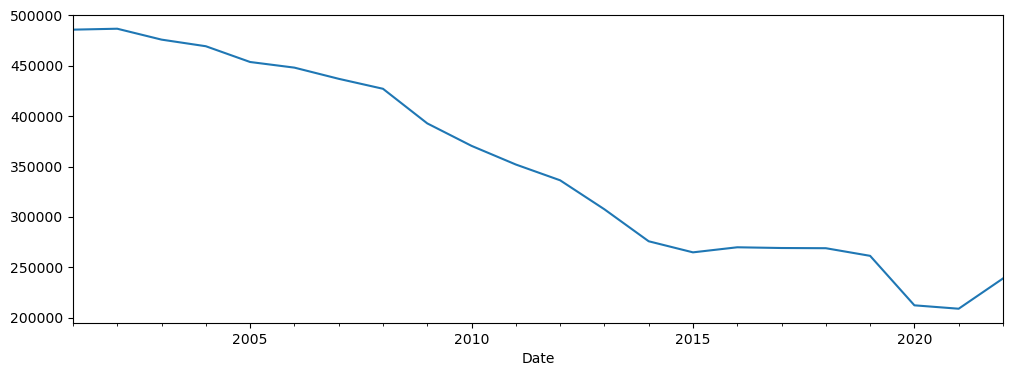

In [11]:
plt.rcParams['figure.figsize'] = [12,4]
ts.plot();

## *Comparing Police Districts*
- Which district had the most crimes in 2022?
- Which had the least?

In [12]:
crimes_ts.loc['2022', 'District'].value_counts()

8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: District, dtype: int64

- District 8 had the most crime in the year 2022.
- District 31 had the least amount of activity.

## *Comparing Holidays*
- What are the top 3 holidays with the largest number of crime?
- For each of the top 3 holidays with the most crime, what are the top 5 most common crimes?

In [13]:
all_days = pd.date_range(crimes["Date"].min(), crimes["Date"].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [14]:
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [15]:
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 01:00:00


"New Year's Day"

In [16]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [17]:
crimes["US Holiday"] = [us_holidays.get(day) for day in crimes['Date']]
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,New Year's Day
1,1319931,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,New Year's Day
2,1324743,2001-01-01 01:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,New Year's Day
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,New Year's Day
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,New Year's Day


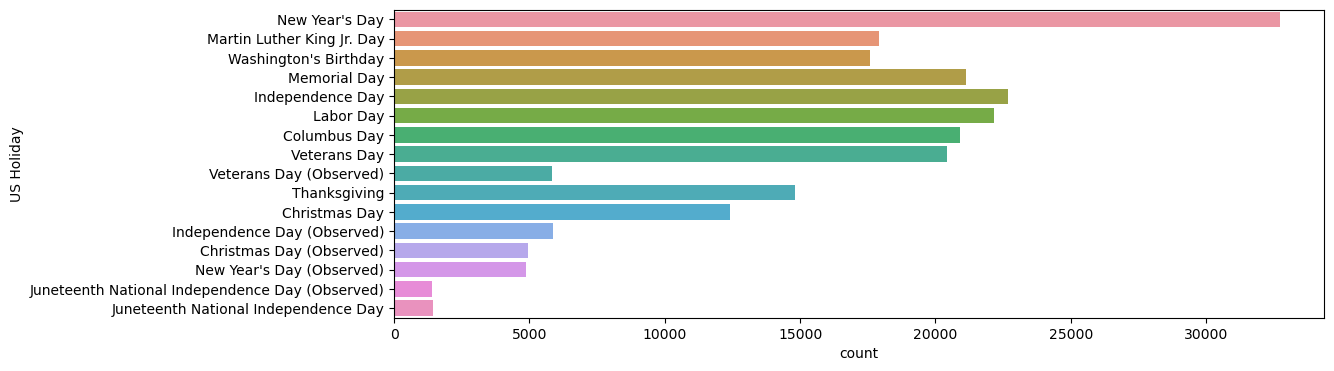

In [18]:
sns.countplot(data=crimes, y='US Holiday');

In [19]:
crimes['US Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Christmas Day (Observed)                            4929
New Year's Day (Observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

In [20]:
crimes_by_hol = crimes.groupby("US Holiday")['Description'].value_counts(normalize=False)
crimes_by_hol

US Holiday             Description                  
Christmas Day          DOMESTIC BATTERY SIMPLE          2102
                       SIMPLE                           1426
                       TO PROPERTY                       871
                       TO VEHICLE                        806
                       $500 AND UNDER                    800
                                                        ... 
Washington's Birthday  TO AIRPORT                          1
                       UNLAWFUL INTERFERE/VISITATION       1
                       UNLAWFUL USE - HANDGUN              1
                       UNLAWFUL USE - OTHER FIREARM        1
                       VIO BAIL BOND: DOM VIOLENCE         1
Name: Description, Length: 3862, dtype: int64

In [21]:
nyd_crimes = crimes_by_hol.loc["New Year's Day"].head(5)
nyd_crimes

Description
SIMPLE                           2912
DOMESTIC BATTERY SIMPLE          2879
FINANCIAL ID THEFT: OVER $300    2211
TO PROPERTY                      1730
$500 AND UNDER                   1462
Name: Description, dtype: int64

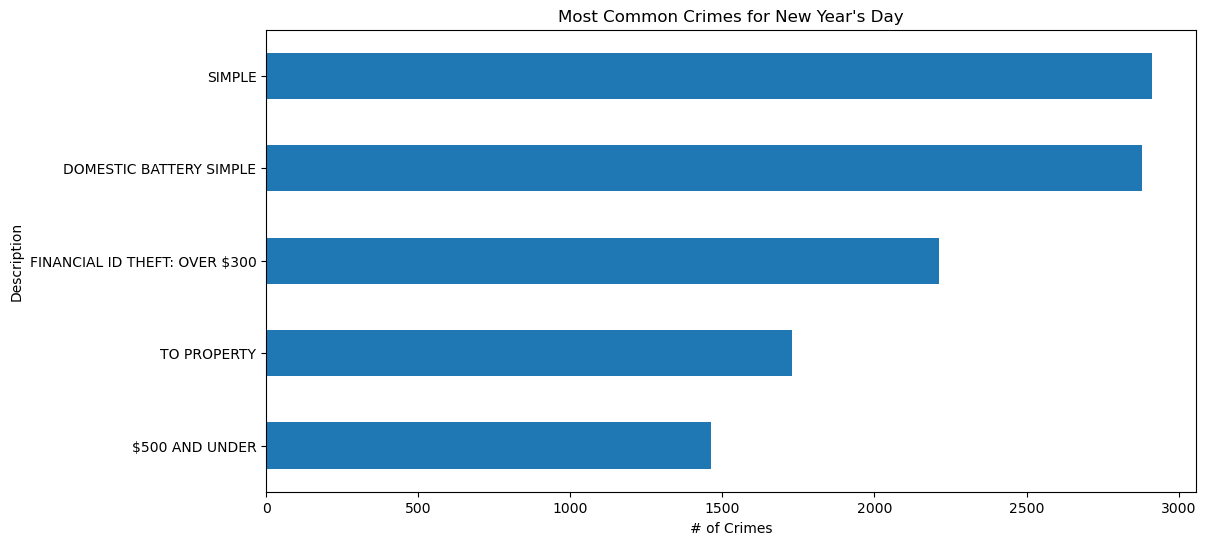

In [22]:
ax = nyd_crimes.sort_values().plot(kind='barh',figsize=(12,6))
ax.set(title="Most Common Crimes for New Year's Day",xlabel='# of Crimes');



In [23]:
ind_crimes = crimes_by_hol.loc["Independence Day"].head(5)
ind_crimes

Description
SIMPLE                     3032
DOMESTIC BATTERY SIMPLE    2667
$500 AND UNDER             1786
TO VEHICLE                 1611
TO PROPERTY                1580
Name: Description, dtype: int64

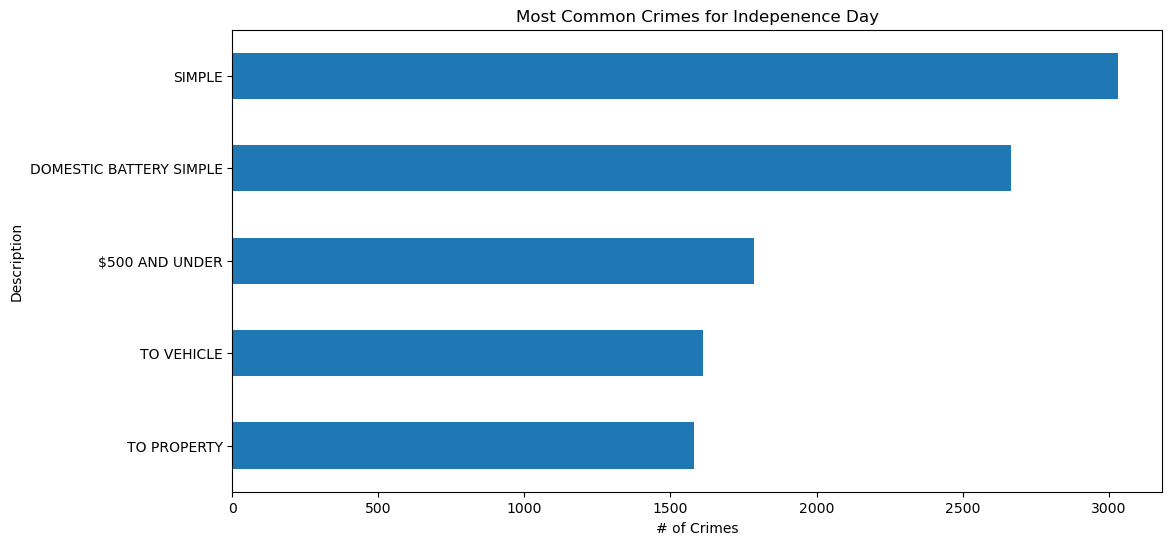

In [29]:
ax = ind_crimes.sort_values().plot(kind='barh',figsize=(12,6))
ax.set(title='Most Common Crimes for Indepenence Day',xlabel='# of Crimes');

In [25]:
ld_crimes = crimes_by_hol.loc["Labor Day"].head(5)
ld_crimes

Description
SIMPLE                     2676
DOMESTIC BATTERY SIMPLE    2209
$500 AND UNDER             1807
TO VEHICLE                 1246
OVER $500                  1187
Name: Description, dtype: int64

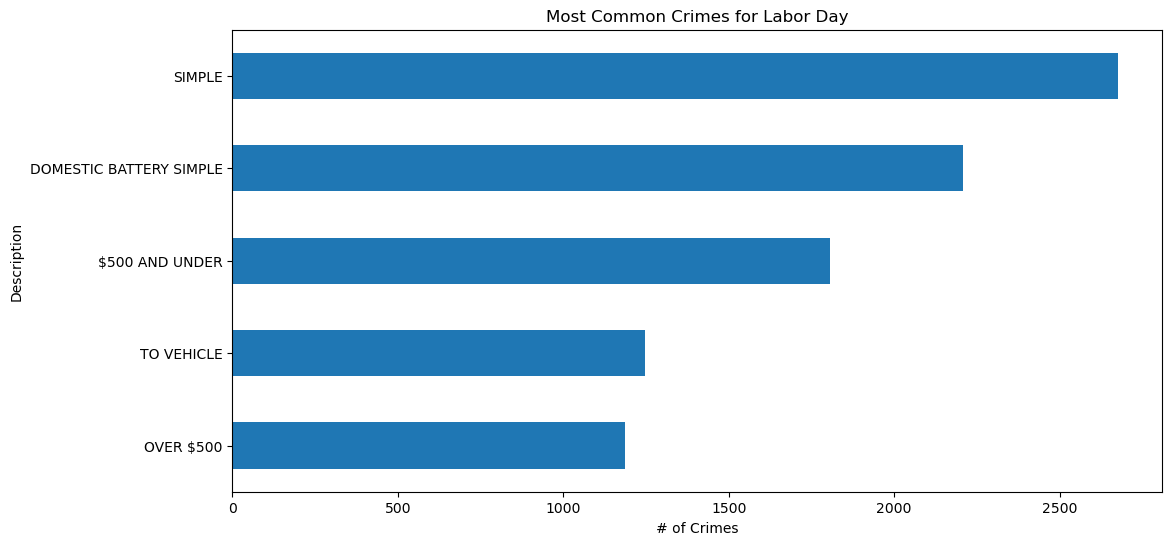

In [31]:
ax = ld_crimes.sort_values().plot(kind='barh',figsize=(12,6))
ax.set(title='Most Common Crimes for Labor Day',xlabel='# of Crimes');

